<a href="https://colab.research.google.com/github/Md-Salman-Rahman339/AI-ML/blob/main/Copy_of_ML_Mid_Term_Exam_Question_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML – MIDTERM EXAM (100 Marks)

This notebook is your **single submission file** for the Midterm.

- **Total marks:** 100  
  - Section A: 40 marks  
  - Section B: 60 marks  
- Answer **all questions** in this notebook.  
- Do **not** create a separate PDF.  
- Use clear headings, code, and explanations.

- Run all cells before submitting so all outputs are visible.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.

In [2]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

---

## SECTION A – Short Application Questions (40 Marks)

Write your answers in the provided **answer cells** in this notebook. Use text, formulas, and short reasoning.

Marks for each question are clearly mentioned.

---

### Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. Show your working clearly.  
2. Use the **IQR rule** to check if 500 is an outlier. Show your steps and the fences.  
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.

Write your full answer in the cell below.


#### Q1 Answer (Student)
1.Data=[30,31,32,32,33,33,34,35,35,500]
Median=(33+33)/2=33
Q1=32
Q3=34
IQR=Q3-Q1=34-32=2
Lower fence=Q1-1.5*IQR=32-3=29
Upper fence=Q1+1.5*IQR=32-3=29

500>37 is an outlier.
500 is extremely large compared to other values.Mean and std strongly affected from this outlier


1.

In [2]:
# Optional helper code for Q1 (not required)
data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
data_q1

[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]

### Q2. Bayes and Probability in ML (10 marks)

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.

Write your full answer in the cell below.


#### Q2 Answer (Student)

_Write your step by step Bayes calculation and explanation here._
P(Disease)=0.01
Sensivity:P(Positive|Disease)=0.90
Specificity:P(Negative| NO Disease)=0.92
False positive rate:P(Positive| NO Disease)=1-0.92=0.08
Bayes' Theorem:
PPV=P(Disease|Positive)=
P(Positive|Disease)*P(Positive)/P(Positive)

P(Positive)=P(Positive|Disease) * P(Positive) +P(Positive| NO Disease)*P(NO Disease)

P(Positive)=(0.90*0.01)+(0.08*0.99)
P(Positive)=0.009+0.079=0.088

PPV=(0.90*0.01)/0.088=0.102=10.2%

2.If prevalence increase to 20% the PPV increase,Beacuse Bayes' Theorem shows that PPV depends strongly on how common the disease is.When more people actually have the disease,a positive test will be a true positive .False positives less dominant than true positive,so higher prevalence meanse higher PPV.

### Q3. ML Pipeline Thinking (15 marks)

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.

Write your full answer in the cell below.


#### Q3 Answer (Student)

_Write your task type, preprocessing list, and pipeline paragraph here._
1.Type of ML task is binary clssification,because target variable premium_user has two classes 0 and 1.


2.preprocessing steps:
i.handle missing values in numerical features
ii.Encode the categorical variable region
iii.Scale or normalize numeric features age and daily_clicks.
iv.Check and handle outliers in numeric columns

end to end ML pipeline:
First, we load the dataset and   understand what columns  and what kind of values are inside. Then, we have to  clean the data by filling in any missing numbers so there are no empty values.Then we need to  change the region column into numbers using one-hot encoding and we scale numeric columns.we have to  divide the data into two parts: one for training the model and one for testing it. Then we train a simple model such as logistic regression or a decision tree using the training data. At the end we check how good the model is using measures like accuracy, precision, recall, and F1-score on the test data.

---

## SECTION B – Applied Coding Problems (60 Marks)

Answer **all three questions** in this section.

- Write clean, commented code.  
- After each main step, add a short markdown explanation of what you did and what you observe.  
- Make sure all plots are visible in the notebook.

Marks for each question are clearly mentioned.

---

### Q4. Applied EDA and Preprocessing (20 marks)

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks (20 marks total):**

1. **Compact EDA using pandas** (6 marks)  
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.


In [3]:
# Q4 – Student Answer

# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})

df

,age,region,purchases,premium_user
0,25.0,north,3.0,0
1,30.0,south,10.0,1
2,NaN,north,5.0,0
3,22.0,east,NaN,0
4,45.0,west,20.0,1
5,52.0,west,18.0,1
6,NaN,south,9.0,0


### Step 1:EDA


In [5]:
print("Missing Values:")
print(df.isnull().sum())
print("\n")
print("Unique values")
print(df.nunique())

Missing Values:
age             2
region          0
purchases       1
premium_user    0
dtype: int64


Unique values
age             5
region          4
purchases       6
premium_user    2
dtype: int64


**Step 2:Correlation Matrix**

In [7]:
print(df[['age','purchases','premium_user']].corr())

                   age  purchases  premium_user
age           1.000000   0.923677      0.789534
purchases     0.923677   1.000000      0.825860
premium_user  0.789534   0.825860      1.000000


# **Step 3:Plots**

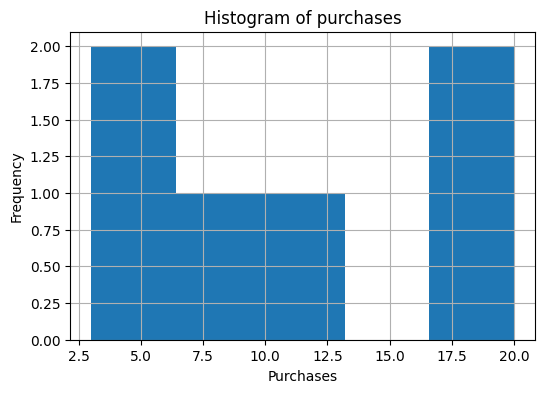

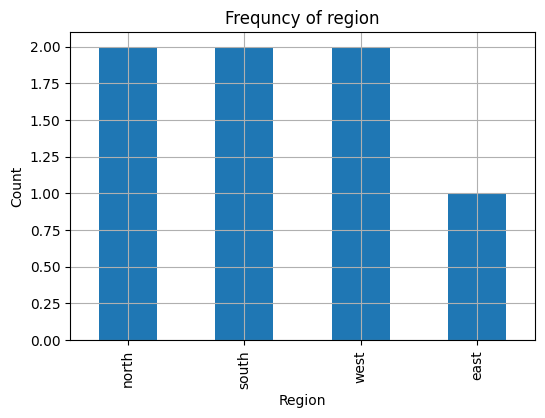

In [9]:
# Histogram
plt.figure(figsize=(6,4))
plt.hist(df['purchases'].dropna(),bins=5)
plt.xlabel('Purchases')
plt.ylabel('Frequency')
plt.title("Histogram of purchases")
plt.show()

# Bar chart
plt.figure(figsize=(6,4))
df['region'].value_counts().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title("Frequncy of region")
plt.show()

# **Step 4:Preprocessing**

In [10]:
df_processed=df.copy()
df_processed['age'].fillna(df_processed["age"].median(),inplace=True)
df_processed['purchases'].fillna(df_processed["purchases"].mean(),inplace=True)

print(df_processed)


    age region  purchases  premium_user
0  25.0  north   3.000000             0
1  30.0  south  10.000000             1
2  30.0  north   5.000000             0
3  22.0   east  10.833333             0
4  45.0   west  20.000000             1
5  52.0   west  18.000000             1
6  30.0  south   9.000000             0


/tmp/ipython-input-3714257593.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['age'].fillna(df_processed["age"].median(),inplace=True)
/tmp/ipython-input-3714257593.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

# **One-Hot Encoding**

In [11]:
df_processed=pd.get_dummies(df_processed,columns=['region'],drop_first=True)
print(df_processed)

    age  purchases  premium_user  region_north  region_south  region_west
0  25.0   3.000000             0          True         False        False
1  30.0  10.000000             1         False          True        False
2  30.0   5.000000             0          True         False        False
3  22.0  10.833333             0         False         False        False
4  45.0  20.000000             1         False         False         True
5  52.0  18.000000             1         False         False         True
6  30.0   9.000000             0         False          True        False


# **Feature Engineering**

In [12]:
df_processed['high_splender']=(df_processed['purchases']>10).astype(int)
print(df_processed)

    age  purchases  premium_user  region_north  region_south  region_west  \
0  25.0   3.000000             0          True         False        False   
1  30.0  10.000000             1         False          True        False   
2  30.0   5.000000             0          True         False        False   
3  22.0  10.833333             0         False         False        False   
4  45.0  20.000000             1         False         False         True   
5  52.0  18.000000             1         False         False         True   
6  30.0   9.000000             0         False          True        False   

   high_splender  
0              0  
1              0  
2              0  
3              1  
4              1  
5              1  
6              0  


In [14]:
# Scaling
scaler=RobustScaler()
numeric_columns=['age','purchases']
df_processed[numeric_columns]=scaler.fit_transform(df_processed[numeric_columns])
print(df_processed)

   age  purchases  premium_user  region_north  region_south  region_west  \
0 -0.5  -0.943820             0          True         False        False   
1  0.0   0.000000             1         False          True        False   
2  0.0  -0.674157             0          True         False        False   
3 -0.8   0.112360             0         False         False        False   
4  1.5   1.348315             1         False         False         True   
5  2.2   1.078652             1         False         False         True   
6  0.0  -0.134831             0         False          True        False   

   high_splender  
0              0  
1              0  
2              0  
3              1  
4              1  
5              1  
6              0  


EDA completed checking values ,unique values and correlation.I have write code for two graphs histogram and bar for better viewing,then filled missing values and region to numbers and i created a new feature called high_splender.

---

### Q5. Applied Regression and Residual Analysis (20 marks)

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks (20 marks total):**

1. Create the dataframe `df2`. (1 mark)  
2. Split the data into **train and test** with 80 percent train and 20 percent test. (3 marks)  
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`. (4 marks)  
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. (4 marks)  
5. Compute the following metrics on the test set. (6 marks)  
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. (2 marks)  
   - Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.


In [ ]:
# Q5 – Student Answer

# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})

df2

_Use additional code cells below for train test split, model training, metrics, and the residual plot. Add a brief comment on the residuals in markdown._

---

### Q6. Applied Classification, Metrics, Trees and ROC (20 marks)

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics (8 marks)**

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC (6 marks)**

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset (6 marks)**

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


In [ ]:
# Q6 – Student Answer

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

# Write your code for threshold 0.5 and 0.3 below

_Add more code cells for ROC and AUC, and for the decision tree on df3. Write your short explanations in markdown after the relevant outputs._